In [24]:
print("Colab siap!")


Colab siap!


In [25]:
import pandas as pd

# membaca dataset
df = pd.read_csv('/content/heart.csv')

# melihat 5 data teratas
df.head()


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [26]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [27]:
# ubah target jadi binary
df['target'] = df['num'].apply(lambda x: 0 if x == 0 else 1)

# cek hasil
df[['num', 'target']].head()


,num,target
0,0,0
1,2,1
2,1,1
3,0,0
4,0,0


In [28]:
df.columns



Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num',
       'target'],
      dtype='object')

In [29]:
df = df.drop(columns=[c for c in ['id', 'dataset', 'num'] if c in df.columns])


In [30]:
df.isnull().sum()


,0
age,0
sex,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55
exang,55
oldpeak,62


In [31]:
import pandas as pd
import numpy as np


In [32]:
df = pd.read_csv('/content/heart.csv')
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [33]:
df['target'] = df['num'].apply(lambda x: 0 if x == 0 else 1)


In [34]:
df = df.drop(columns=[c for c in ['id', 'dataset', 'num'] if c in df.columns])


In [35]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

df.isnull().sum()


/tmp/ipython-input-4185970650.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipython-input-4185970650.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,0


In [36]:
df = pd.get_dummies(df, drop_first=True)

In [37]:
X = df.drop('target', axis=1)
y = df['target']


In [38]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
)


In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)


In [40]:
print(X_train.shape)


(644, 18)


In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])


In [42]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [43]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=16
)


Epoch 1/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.6624 - loss: 0.6138 - val_accuracy: 0.8188 - val_loss: 0.4642
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.6624 - loss: 0.6138 - val_accuracy: 0.8188 - val_loss: 0.4642
Epoch 2/50
Epoch 2/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7885 - loss: 0.4638 - val_accuracy: 0.8406 - val_loss: 0.4001
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7885 - loss: 0.4638 - val_accuracy: 0.8406 - val_loss: 0.4001
Epoch 3/50
Epoch 3/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8136 - loss: 0.4082 - val_accuracy: 0.8333 - val_loss: 0.3770
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8136 - loss: 0.4082 - val_accuracy: 0.8333 - val_loss: 0.3770
Epoch 4/50
Epoch 4/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8607 - loss: 0.3506 - val_accuracy: 0.8406 - val_loss: 0.3785
Epoch 5/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8607 - loss: 0.3506 - val_accuracy: 0.8406 - val

In [44]:
loss, acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", acc)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8198 - loss: 0.5513 
Test Accuracy: 0.804347813129425
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8198 - loss: 0.5513 
Test Accuracy: 0.804347813129425


In [45]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = (model.predict(X_test) > 0.5).astype(int)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step[[51 10]
 [17 60]]
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
[[51 10]
 [17 60]]
              precision    recall  f1-score   support

           0       0.75      0.84      0.79        61
           1       0.86      0.78      0.82        77

    accuracy                           0.80       138
   macro avg       0.80      0.81      0.80       138
weighted avg       0.81      0.80      0.80       138

              precision    recall  f1-score   support

           0       0.75      0.84      0.79        61
           1       0.86      0.78      0.82        77

    accuracy                           0.80       138
   macro avg       0.80      0.81      0.80       138
weighted avg       0.81      0.80      0.80       138



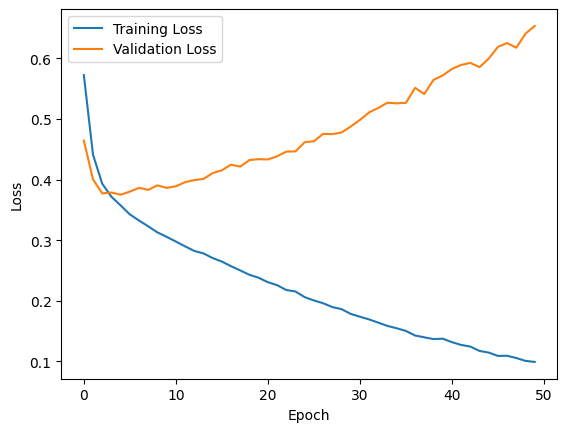

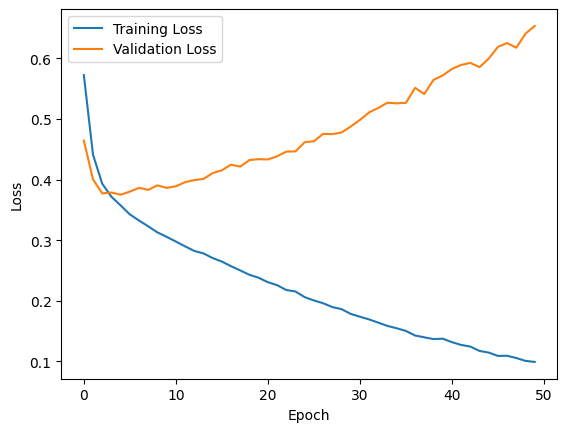

In [46]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
